In [ ]:
from scipy.io import loadmat
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import shap
import numpy as np
from yellowbrick.features import PCA

shap.initjs()

## Outlier Detection

 - Sometimes your data is fishy
 - Outlier detection is a principled way of investigating

## Data Example

 - Using a classic: Lympho dataset from the UCI Machine Learning Repository
 - Lymphography is a medical imaging procedure to detect Lymph node-based cancers (mostly replaced by PET scans)
 - Contains 148 data points with 18 features and 6 outliers


In [43]:
data = loadmat("data/lympho.mat")
features = data['X']
labeler = LabelEncoder()
ground_truth = labeler.fit_transform(data['y'].ravel())
labels =['Typical', 'Outlier']

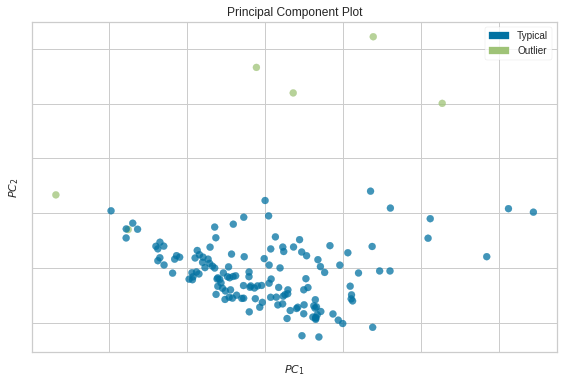

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [40]:
pca_visualizer = PCA(scale=True, classes=labels)
pca_visualizer.fit_transform(features, ground_truth)
pca_visualizer.show()

In [31]:
iso_forest = IsolationForest(random_state=1, n_jobs=-1, n_estimators=500, contamination=0.04)

In [44]:
model_prediction = iso_forest.fit_predict(features)
model_prediction = labeler.transform(np.vectorize(lambda x: 0 if x == 1 else 1)(model_prediction))

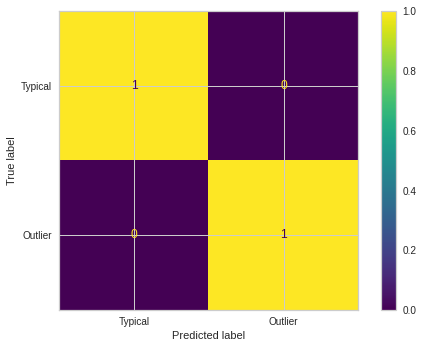

In [54]:
cm = confusion_matrix(model_prediction, ground_truth, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

## SHAP

In [60]:
shap_explainer = shap.Explainer(iso_forest, algorithm='tree')
shap_values = shap_explainer(features)

In [61]:
shap_values

.values =
array([[-0.34304822, -0.04422034,  0.09872132, ..., -0.17280883,
        -0.39022836,  0.10039508],
       [-0.41136514, -0.11165161,  0.10663053, ..., -0.22503222,
        -0.49133498,  0.01005716],
       [ 0.04914938, -0.036467  , -0.43994586, ...,  0.05793838,
         0.0814529 , -0.1369474 ],
       ...,
       [ 0.11006201, -0.04550651,  0.15184758, ..., -0.43409509,
         0.18882497,  0.09160458],
       [ 0.10297217,  0.08379868,  0.10737482, ...,  0.18144833,
         0.19680005, -0.21549539],
       [ 0.08598983,  0.07654877,  0.17431268, ...,  0.19219986,
         0.20910613, -0.16435128]])

.base_values =
array([[9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
       [9.33631028],
    

In [67]:
shap.force_plot(shap_values[0])

## Bibliography

In [66]:
!pip install matplotlib

You should consider upgrading via the '/home/deadhand/.cache/pypoetry/virtualenvs/outlier-detection-Kz8MtAP--py3.8/bin/python -m pip install --upgrade pip' command.
